In [1]:
import numpy as np

In [2]:
from slacker import Slacker
token  =  ""
slack = Slacker(token)
def slack_log(message):
    try:
        slack.chat.post_message('#log-traininglog', "ImageCapation Build Model: {}".format(message))
    except:
        print("slack connection error")

slack_log('Initial Logger')   

# Load Raw Capation Data

In [3]:
import json
raw_capation = json.load(open("./train.json",'r'))

# Load Capation Data

In [4]:
import pickle
class MyTokenizer:
    caption_indexed = None
    w2index = None
    index2w = None
# mytokenizer = MyTokenizer()

# mytokenizer.caption_indexed = caption_indexed
# mytokenizer.index2w = index2w
# mytokenizer.w2index = w2index

In [5]:
mytokenizer = pickle.load(open("./mytokenizer.pk","rb"))

In [6]:
VOC_SIZE = len(mytokenizer.w2index)

In [7]:
len(mytokenizer.caption_indexed)

82783

# Load Image Feature

In [8]:
import h5py
img_f = h5py.File("vgg16_feature.hdf5", "r") 
len(img_f['image_feautre'])

82783

In [9]:
import json
img_list = json.load(open("./image_list.json",'r'))
len(img_list)

82783

# Load VGG16 Model

In [10]:
from os import listdir
from pickle import dump
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model

import h5py
import numpy as np

import json

Using TensorFlow backend.


In [11]:
# load the model
model_vgg16 = VGG16()
# re-structure the model
model_vgg16.layers.pop()
model_vgg16 = Model(input=model_vgg16.inputs, output=model_vgg16.layers[-1].output)
# summarize
print(model_vgg16.summary())
# extract features from each photo

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("fc..., inputs=[<tf.Tenso...)`
  """


# Load Capation Model

In [12]:
from numpy import array
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model,load_model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint

In [13]:
MAX_LENGTH = 22



In [14]:
model = load_model("./coco_model_ep_9.h5")

# Do Prediction

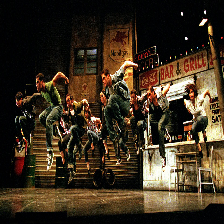

In [15]:
from PIL import Image
from urllib.request import urlopen
from IPython.display import display

url = "http://img.youtube.com/vi/P2HDP892vdw/maxresdefault.jpg"
image = Image.open(urlopen(url))
# load an image from file
# filename = "/home/kent/git/aiacademy-learning-notebook/Project/ImageCaption/data/coco/images/train2014/COCO_train2014_000000000009.jpg"
# image = load_img(filename, target_size=(224, 224))
image  = image.resize((224, 224))
display(image)

# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
images_array = preprocess_input(np.array([image]).reshape((1, 224, 224, 3)))

feature = model_vgg16.predict(images_array, verbose=0)[0]

In [16]:
in1 = feature
in_text = 'startstart'

# iterate over the whole length of the sequence
in_text = ''
in_index = [mytokenizer.w2index['startstart']]
for i in range(MAX_LENGTH):


    sequence = in_index

    # pad input

    sequence = pad_sequences([sequence], maxlen=MAX_LENGTH)

    # predict next word
    yhat = model.predict([np.array([in1]),sequence], verbose=0)
    model.reset_states()
    # convert probability to integer
    yhat = np.argmax(yhat)

    word = mytokenizer.index2w[yhat]
    in_index.append(yhat)


    # append as input for generating the next word
    # stop if we predict the end of the sequence
    if word == 'endend':
        break

    in_text += ' ' + word

print(in_text)

 a man riding a skateboard down a street
